In [2]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Load the data
insect_data = pd.read_csv("Insect.csv")
insect_data



,contador,producto,orden
0,10,Clorban,1
1,11,Bioquim,1
2,21,Diazinon,1
3,7,Clorban,2
4,17,Bioquim,2
5,20,Diazinon,2
6,20,Clorban,3
7,21,Bioquim,3
8,15,Diazinon,3
9,14,Clorban,4


In [3]:
# Convert 'spray' column to a factor
insect_data['producto'] = insect_data['producto'].astype('category')

# 2. Summary Statistics
print(insect_data.groupby('producto').describe())



         contador                                                      orden  \
            count       mean       std   min    25%   50%    75%   max count   
producto                                                                       
Bioquim      12.0  15.333333  4.271115   7.0  12.50  16.5  17.50  21.0  12.0   
Clorban      12.0  14.500000  4.719399   7.0  11.50  14.0  17.75  23.0  12.0   
Diazinon     12.0  19.416667  4.440687  13.0  15.75  19.0  22.50  26.0  12.0   

                                                     
         mean       std  min   25%  50%   75%   max  
producto                                             
Bioquim   6.5  3.605551  1.0  3.75  6.5  9.25  12.0  
Clorban   6.5  3.605551  1.0  3.75  6.5  9.25  12.0  
Diazinon  6.5  3.605551  1.0  3.75  6.5  9.25  12.0  


C:\Users\anton\AppData\Local\Temp\ipykernel_19824\632566340.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(insect_data.groupby('producto').describe())


<Figure size 800x600 with 0 Axes>

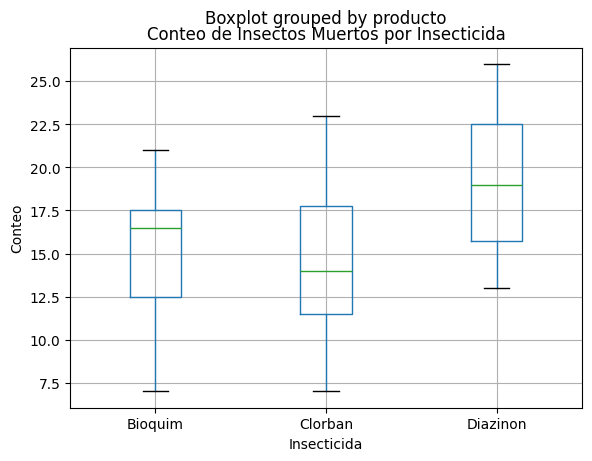

                            OLS Regression Results                            
Dep. Variable:               contador   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     4.138
Date:                Tue, 21 May 2024   Prob (F-statistic):             0.0249
Time:                        01:06:25   Log-Likelihood:                -103.51
No. Observations:                  36   AIC:                             213.0
Df Residuals:                      33   BIC:                             217.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.3333 

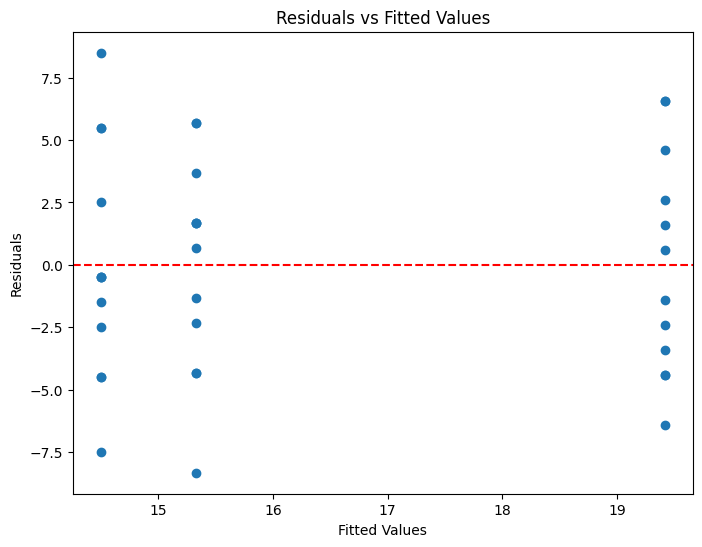


Tukey HSD Post Hoc Test:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
Bioquim  Clorban  -0.8333 0.8923 -5.3221 3.6554  False
Bioquim Diazinon   4.0833 0.0805 -0.4054 8.5721  False
Clorban Diazinon   4.9167 0.0293  0.4279 9.4054   True
------------------------------------------------------


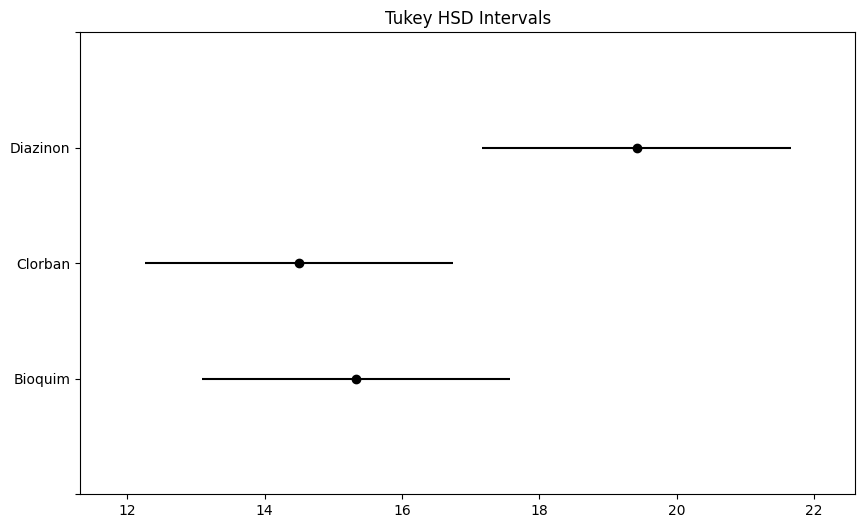


ANOVA Results:
F-statistic: 4.137970066658281
P-value: 0.024916092755252847

There is a statistically significant difference in insect counts between at least two of the insecticides.
Tukey's HSD post-hoc test reveals the specific differences between groups, as shown in the plot and table above.

Eta-squared (Effect Size): 0.20050276520864752


In [4]:

# 3. Boxplot
plt.figure(figsize=(8,6))
insect_data.boxplot(column='contador', by='producto')
plt.title('Conteo de Insectos Muertos por Insecticida')
plt.xlabel('Insecticida')
plt.ylabel('Conteo')
plt.show()

# 5. Fit the ANOVA model
model = sm.ols('contador ~ producto', data=insect_data).fit()
print(model.summary())

# 6 & 7. Assumption Checks - Not as straightforward in Python as in R
# We'll skip the formal tests for now but visually inspect the residuals
residuals = model.resid
plt.figure(figsize=(8,6))
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 8. Post-hoc Analysis
tukey = pairwise_tukeyhsd(insect_data['contador'], insect_data['producto'], alpha=0.05)
print("\nTukey HSD Post Hoc Test:\n", tukey)

# 9. Plot Tukey HSD results
tukey.plot_simultaneous()
plt.title('Tukey HSD Intervals')
plt.show()

# 10. Report Findings
print("\nANOVA Results:")
print("F-statistic:", model.fvalue)
print("P-value:", model.f_pvalue)
print("\nThere is a statistically significant difference in insect counts between at least two of the insecticides.")
print("Tukey's HSD post-hoc test reveals the specific differences between groups, as shown in the plot and table above.")

# 11. Effect Size (Eta-squared) - Manually calculate for now
# Eta-squared = Sum of Squares between groups / Total Sum of Squares
# Extract these from the ANOVA table
SS_between = model.ess
SS_total = model.centered_tss
eta_squared = SS_between / SS_total
print("\nEta-squared (Effect Size):", eta_squared)

# 12 & 13. Power Analysis -  Requires specialized packages like statsmodels or pingouin
# We'll omit the power analysis for this example. 

# Conclusion
# Based on the ANOVA and post-hoc analysis, there's evidence that the choice of insecticide significantly impacts the count of dead insects. 
# The specific differences between insecticides are highlighted by the Tukey HSD test.